#### down up sampling
1. trainデータの読み込み
2. データの前処理(モデリング時と同様)
3. データの分割（50万未満/異常で分ける）
4. 低価格データのクラスタリングを行う(各クラスの所属数を算出する)
5. 低価格データをRandomUnderSamplerでダウンサンプリングする
6. 高価格データを低価格データ数に合わせでアップサンプリングする
7. 高価格/低価格データを合体して、出力する

In [13]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
#configファイルの読み込み
import configparser
config_ini = configparser.ConfigParser()
config_ini.read('../config/config.ini', encoding='utf-8')

['../config/config.ini']

In [ ]:
#read_file_congfig
train_file      = "." + config_ini["INPUT_FILE"]["train"]
deginition_file = "." + config_ini["CONFIG_FILE"]["deginition"]

#### import data

In [ ]:
# 学習データ読込
df = pd.read_csv(train_file)

C:\Users\User\AppData\Local\Temp\ipykernel_18596\1175780208.py:1: DtypeWarning: Columns (39,40,42,55,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(train_file)


In [ ]:
# データ処理の定義を読込
deginition_df = pd.read_excel(deginition_file)
deginition_df  = deginition_df.query('採否_original == "◎"|採否_original == "〇"| 採否_original == "△"')

In [11]:
#類似度判定をするときに考慮するカラムを取得
selected_col = deginition_df["本番データ特徴量名"]
selected_df  = df[selected_col]

#家賃50万以上だけを抽出
selected_df  = selected_df.query("money_room > 300000")

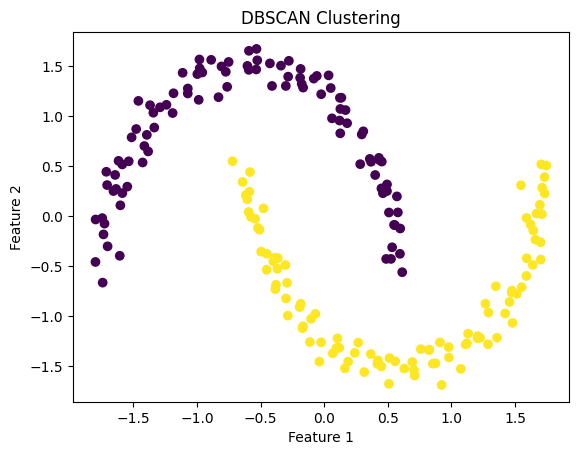

In [14]:
# データセットを生成する
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# データを標準化する
X = StandardScaler().fit_transform(X)

# DBSCANを適用する
db = DBSCAN(eps=0.3, min_samples=5)
db.fit(X)

# ラベルを取得してプロットする
labels = db.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels)

# タイトルとラベルを設定
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# プロットを表示
plt.show()
